# Basic Recommender System Workings

## Importing Relevant Packages and Datasets

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
dataframe_names = [
    'user_friends',
    'user_taggedartists',
    'artists',
    'tags',
    'user_artists',
    'user_artists_ratings']

file_names = [
    '../data/user_friends.csv',
    '../data/user_taggedartists.csv',
    '../data/artists.csv',
    '../data/tags.csv',
    '../data/user_artists.csv',
    '../data/user_artists_ratings.csv']

In [45]:
for (dataframe, file) in zip(dataframe_names, file_names):
    vars()[dataframe] = pd.read_csv(file)

## Recommender System Outline

For the basic recommender system, this will not take in any personalisation - it will be the same recommendations for all users.

This recommender system only recommends artists that have high ratings.

We will use the artists' average ratings, but this could be skewed by an artist who has very few ratings that yield a high average. To prevent this, we will take the top 10% of artists that have the highest number of user ratings, and then filter to find the artists with the highest average rating.


1. Make one for most popular all time
2. Make one for trending and use the timestamps one - maybe per genre?

In [9]:
artists_users_ratings = (
    user_artists_ratings
    .groupby('artistID', as_index=False)
    .agg({'userID': ['count'], 'rating': ['mean']})
)

In [10]:
artists_users_ratings.columns = ['artistID', 'count_users', 'avg_rating']

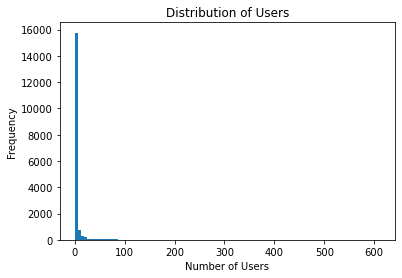

In [11]:
plt.hist(artists_users_ratings['count_users'], bins=100)
plt.gca().set(
    title='Distribution of Users', 
    xlabel='Number of Users',
    ylabel='Frequency'
);

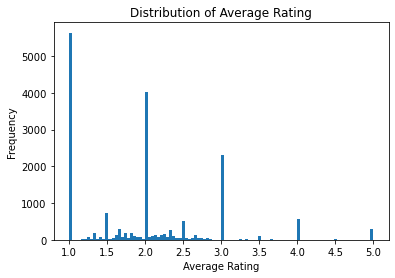

In [12]:
plt.hist(artists_users_ratings['avg_rating'], bins=100)
plt.gca().set(
    title='Distribution of Average Rating', 
    xlabel='Average Rating',
    ylabel='Frequency'
);

Make a comment about these graphs.

## Recommending the Top 5 Artists that You Might Like

In [13]:
## Finding the top 10% of artists
np.percentile(artists_users_ratings['count_users'], 90)

8.0

In [34]:
len(artists_users_ratings[artists_users_ratings['count_users']==1]['count_users'])/len(artists_users_ratings['count_users'])

0.605660163339383

Over 60% of artists have only had one user listen to their music. 

In [36]:
most_listened_to_artists = artists_users_ratings[artists_users_ratings['count_users']>=8]

In [39]:
most_listened_to_artists['avg_rating'].max()

3.5

Since the highest average rating for the top 10% of artists is only 3.5, we can either increase the amount of artists being considered (increase to the top 20% of artists), or we can identify the amount of times the artists is listened to per user. 

## Identifying Total Listens per User

In [41]:
artists_total_listens = (
    user_artists_ratings
    .groupby('artistID', as_index=False)
    .agg({'userID': ['count'], 'rating': ['mean'], 'weight': ['sum']})
)

In [43]:
artists_total_listens.columns = ['artistID', 'count_users', 'avg_rating', 'total_listens']

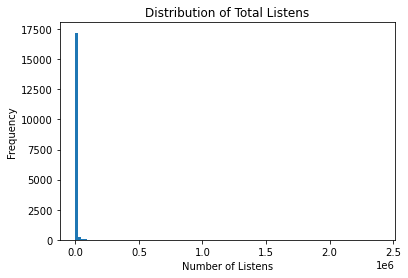

In [45]:
plt.hist(artists_total_listens['total_listens'], bins=100)
plt.gca().set(
    title='Distribution of Total Listens', 
    xlabel='Number of Listens',
    ylabel='Frequency'
);

In [47]:
## Finding the top 10% of artists
np.percentile(artists_total_listens['total_listens'], 90)

4645.399999999998

In [48]:
artists_highest_total_listens = artists_total_listens[artists_total_listens['total_listens']>=4645]

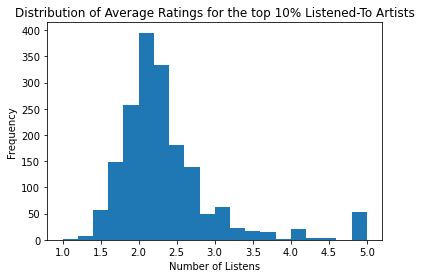

In [53]:
plt.hist(artists_highest_total_listens['avg_rating'], bins=20)

plt.gca().set(
    title='Distribution of Average Ratings for the top 10% Listened-To Artists', 
    xlabel='Number of Listens',
    ylabel='Frequency'
);

In [67]:
artists_highest_listens = artists_highest_total_listens[artists_highest_total_listens['count_users']>=5]

By filtering this dataset to only artists that have a user count above 5, removed artists that have one/two user(s) who have listened a very large number of times and have given 5-star ratings.

(array([ 20., 182., 461., 487., 255., 105.,  44.,   5.,   4.,   1.]),
 array([1.1875 , 1.48875, 1.79   , 2.09125, 2.3925 , 2.69375, 2.995  ,
        3.29625, 3.5975 , 3.89875, 4.2    ]),
 <BarContainer object of 10 artists>)

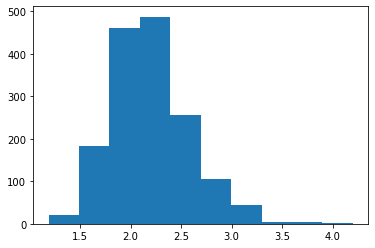

In [71]:
plt.hist(artists_highest_listens['avg_rating']);

In [77]:
recommendations = artists_highest_listens['avg_rating'].nlargest(2)

In [80]:
recommendations

10886    4.200000
2285     3.833333
Name: avg_rating, dtype: float64

In [83]:
artists_ordered_popularity = artists_highest_listens.sort_values(by='avg_rating', ascending=False)

In [91]:
artist1_rec = artists_ordered_popularity.iloc[0,]['artistID']
artist2_rec = artists_ordered_popularity.iloc[1,]['artistID']

In [111]:
artist1_details = artists[artists['id']==artist1_rec]
artist1_name = artist1_details.values[0][1]
artist1_link = artist1_details.values[0][2]

In [107]:
artist2_details = artists[artists['id']==artist2_rec]
artist2_name = artist2_details.values[0][1]
artist2_link = artist2_details.values[0][2]

In [109]:
artist2_link

'http://www.last.fm/music/Ezginin+G%C3%BCnl%C3%BC%C4%9F%C3%BC'

In [112]:
print("We think you might like " + artist1_name + ", and you can view their profile through this link: " + artist1_link)

We think you might like Bernard Butler, and you can view their profile through this link: http://www.last.fm/music/Bernard+Butler


In [114]:
print("You might also like " + artist2_name + ", and you can view their profile through this link: " + artist2_link)

You might also like Ezginin Günlüğü, and you can view their profile through this link: http://www.last.fm/music/Ezginin+G%C3%BCnl%C3%BC%C4%9F%C3%BC


It might also be interesting to allow the user to decide what percentage of artists they want to see

Let's see the results for if we wanted 50% of the artists included.

In [15]:
## Finding the top 10% of artists
np.percentile(artists_users_ratings['count_users'], 10)

1.0